<a href="https://colab.research.google.com/github/jay-D-Deshmukh/Fitness_-_Health_App/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [4]:
df  =  pd.read_csv("/content/drive/MyDrive/Data sets/data_cardiovascular_risk.csv")

In [5]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
# Droping ID column as it is no use
df = df.drop(columns=['id'])

In [8]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

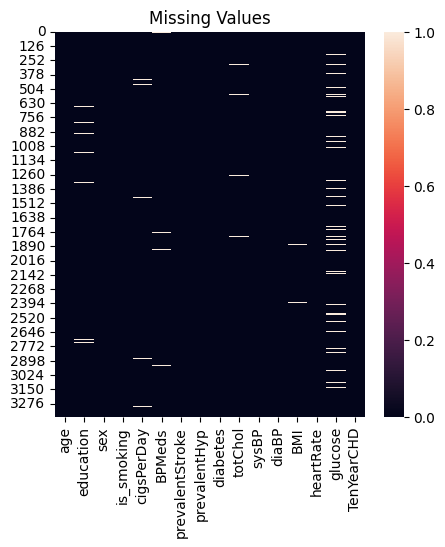

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.title("Missing Values")
plt.show()

In [13]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
num_columns = []
for i in df.columns:
  if df[i].dtype == 'float64' or df[i].dtype == 'int64':
    num_columns.append(i)

print(num_columns)

['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


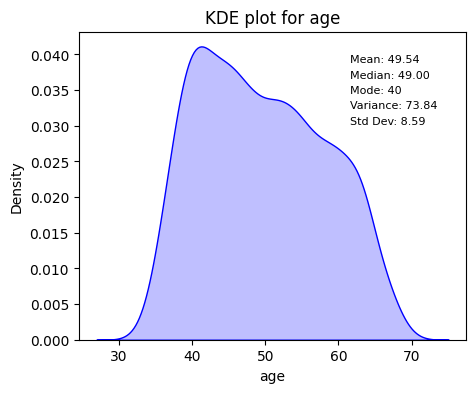

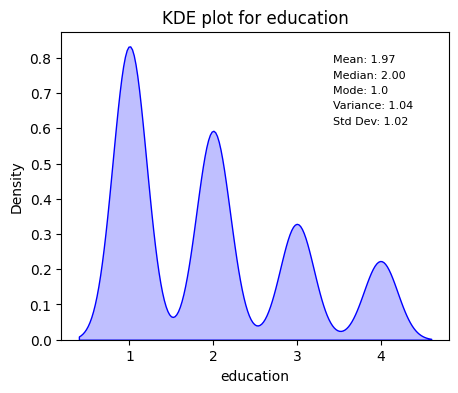

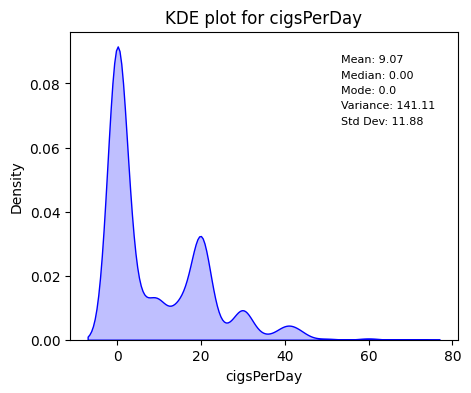

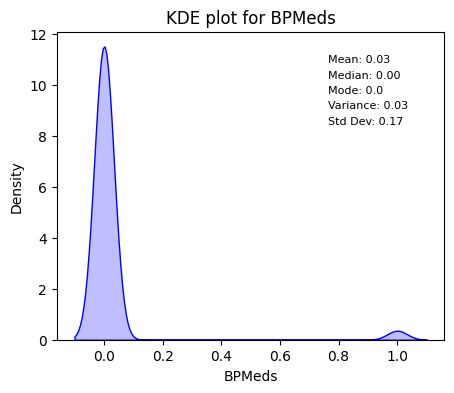

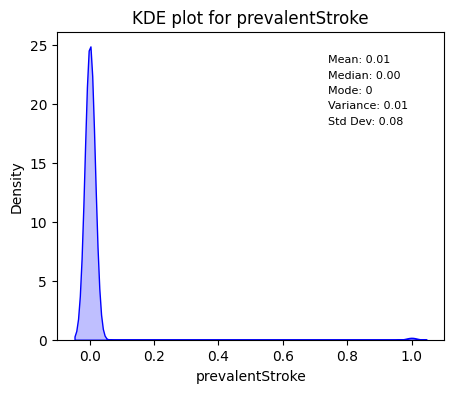

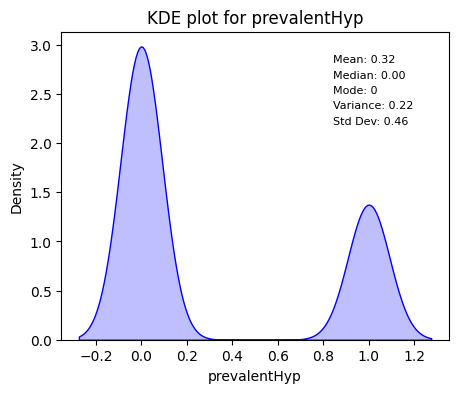

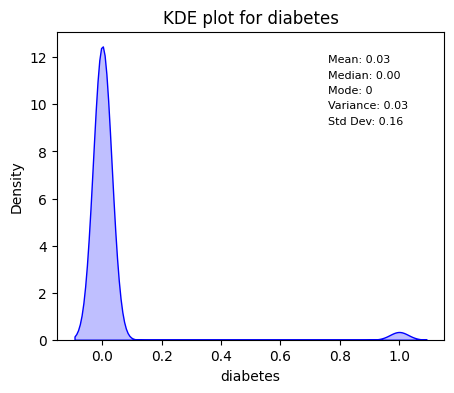

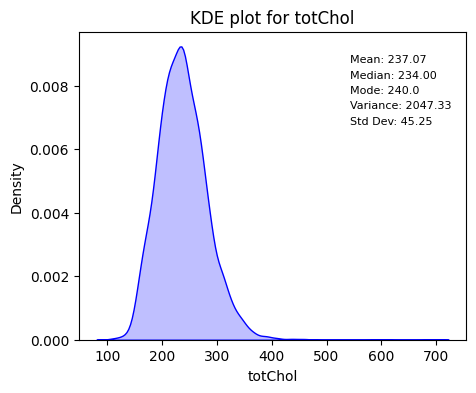

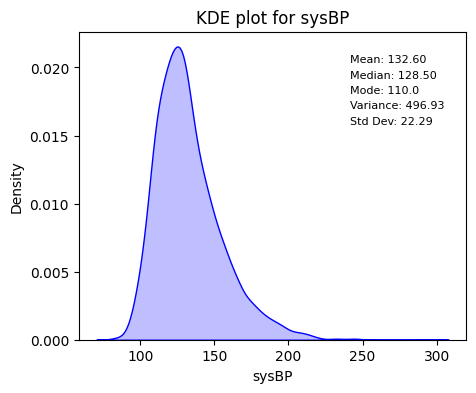

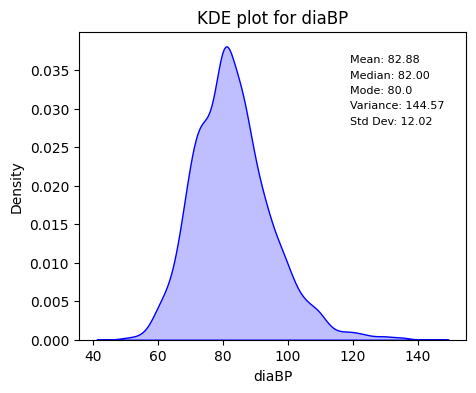

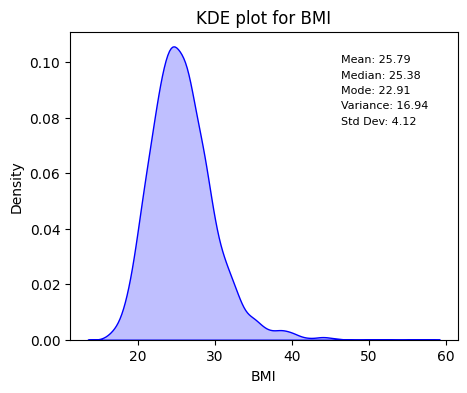

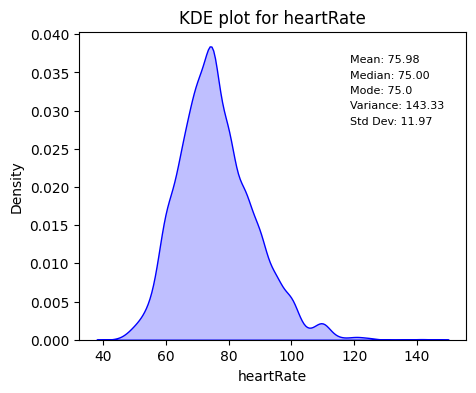

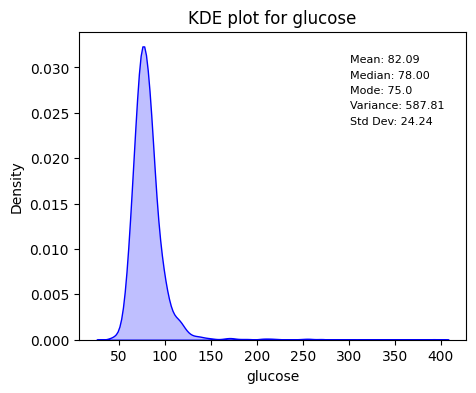

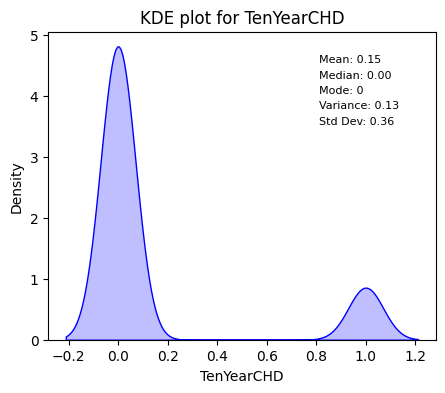

In [15]:
for column in num_columns:
    plt.figure(figsize=(5,4))

    # Plot the KDE plot
    sns.kdeplot(df[column], color='blue', fill=True)

    # Calculate statistics
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    variance = df[column].var()
    std_dev = df[column].std()

    # Set labels and title
    plt.title(f'KDE plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

    # Add statistics to the plot
    plt.text(0.7, 0.9, f'Mean: {mean:.2f}', fontsize=8, transform=plt.gca().transAxes)
    plt.text(0.7, 0.85, f'Median: {median:.2f}', fontsize=8, transform=plt.gca().transAxes)
    plt.text(0.7, 0.8, f'Mode: {mode}', fontsize=8, transform=plt.gca().transAxes)
    plt.text(0.7, 0.75, f'Variance: {variance:.2f}', fontsize=8, transform=plt.gca().transAxes)
    plt.text(0.7, 0.7, f'Std Dev: {std_dev:.2f}', fontsize=8, transform=plt.gca().transAxes)

    # Show the plot
    plt.show()


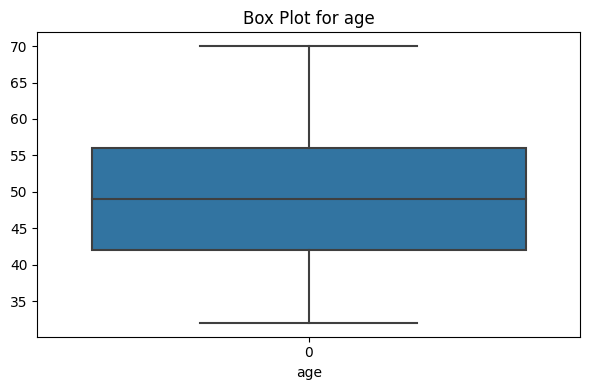

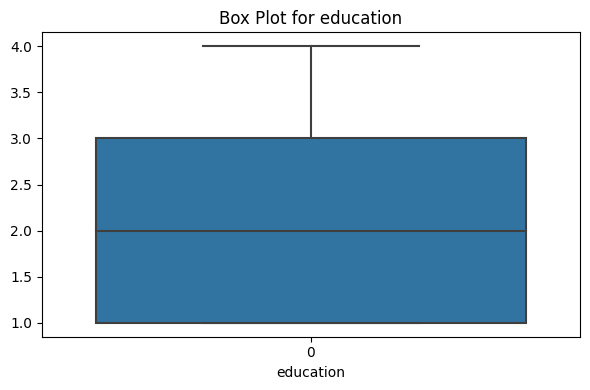

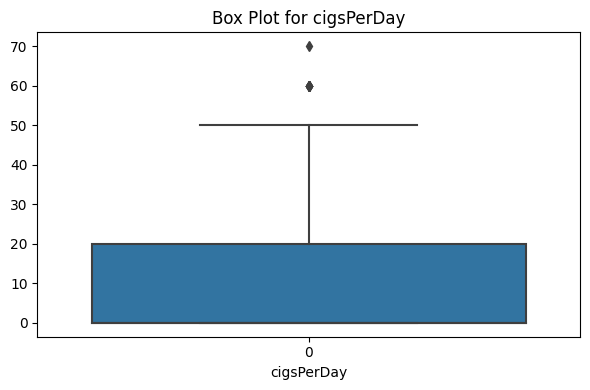

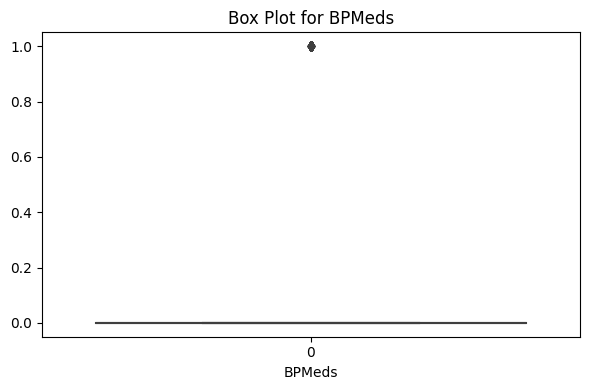

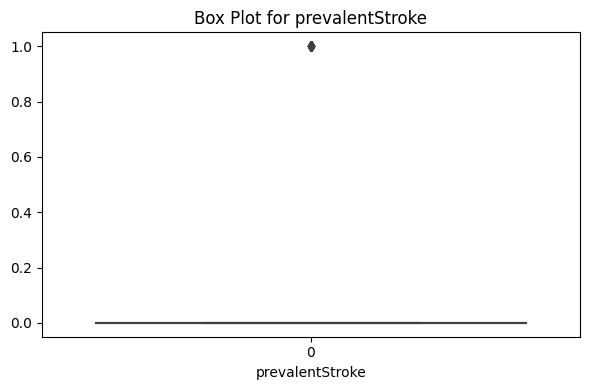

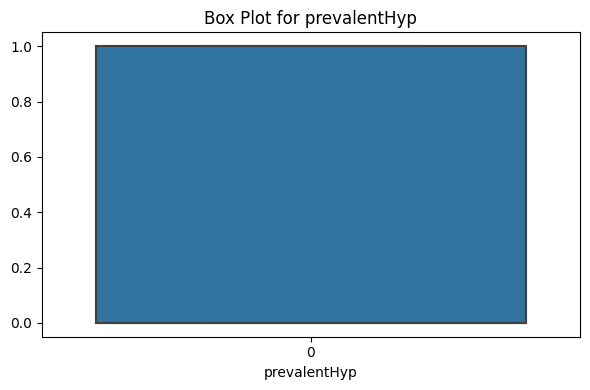

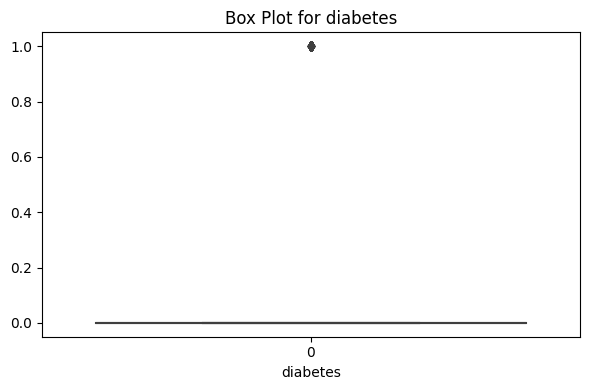

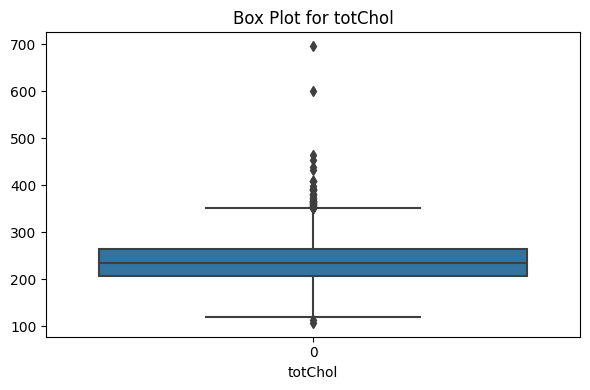

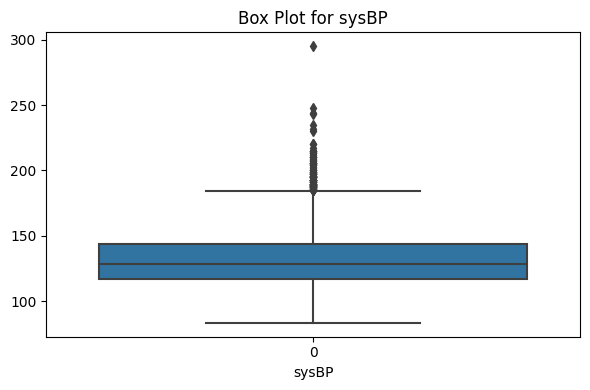

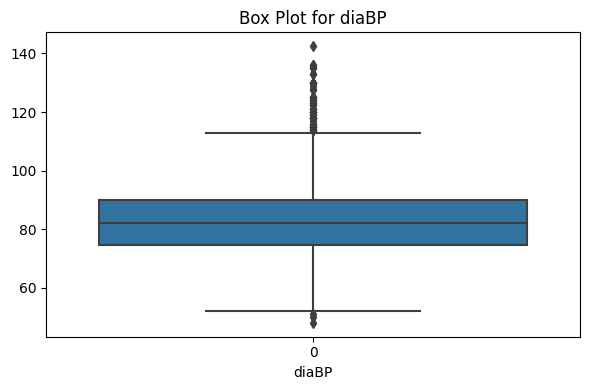

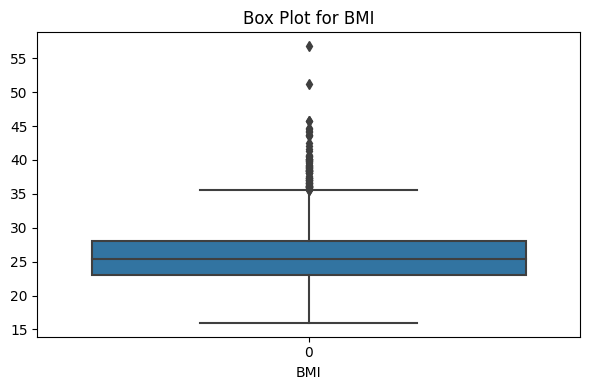

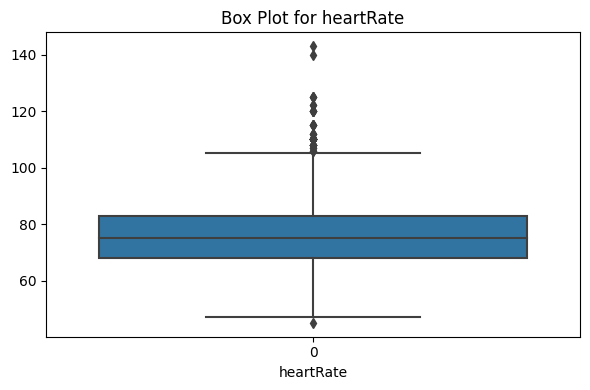

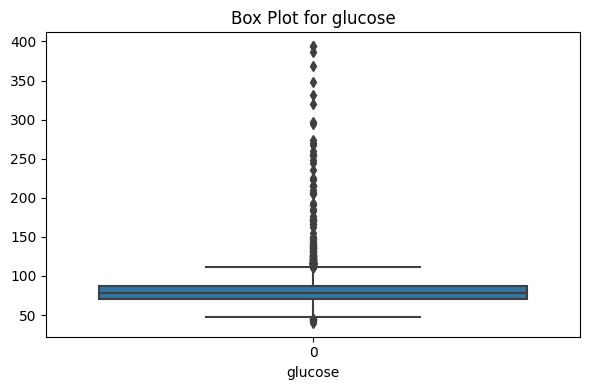

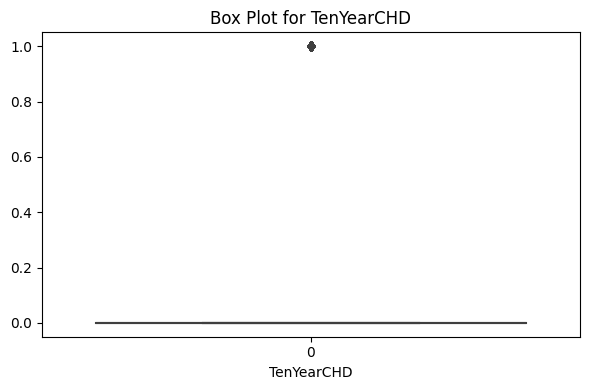

In [16]:
for column in num_columns:
    # Create a box plot for the column
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])

    # Add title and labels
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [17]:
num_columns

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

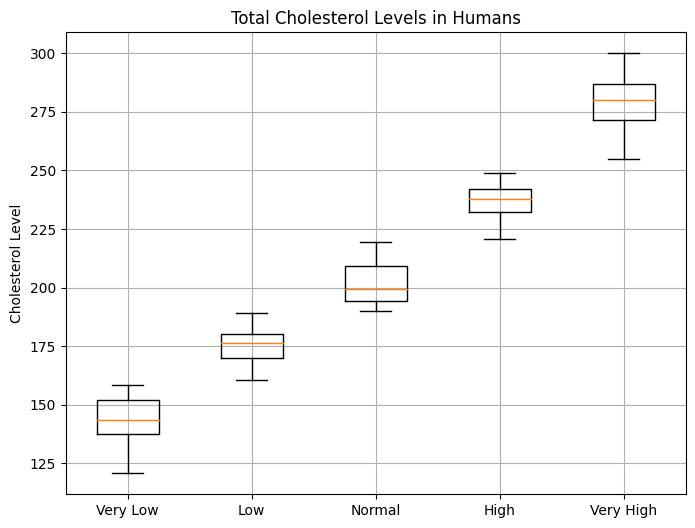

In [20]:

# Generate random data for different cholesterol categories
np.random.seed(0)

very_low = np.random.uniform(120, 160, 20)
low = np.random.uniform(160, 190, 30)
normal = np.random.uniform(190, 220, 50)
high = np.random.uniform(220, 250, 30)
very_high = np.random.uniform(250, 300, 20)

# Combine the data into a list of lists
data = [very_low, low, normal, high, very_high]

# Create labels for the categories
labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)

# Add title and labels
plt.title("Total Cholesterol Levels in Humans")
plt.ylabel("Cholesterol Level")

# Show the plot
plt.grid(True)
plt.show()


In [21]:


def calculate_iqr_bounds(data):
    q3, q1 = np.percentile(data, [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return iqr, lower_bound, upper_bound

# Example data
data = df['totChol']

# Calculate IQR, lower bound, and upper bound
iqr, lower_bound, upper_bound = calculate_iqr_bounds(data)

print(f"The Interquartile Range (IQR) is: {iqr:.2f}")
print(f"The Lower Bound for potential outliers is: {lower_bound:.2f}")
print(f"The Upper Bound for potential outliers is: {upper_bound:.2f}")

print(f"The Interquartile Range (IQR) is: {iqr:.2f}")


The Interquartile Range (IQR) is: 58.00
The Lower Bound for potential outliers is: 119.00
The Upper Bound for potential outliers is: 351.00
The Interquartile Range (IQR) is: 58.00


In [22]:

def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return np.where(column < lower_bound, lower_bound, np.where(column > upper_bound, upper_bound, column))



# Apply IQR method to specified column
df['totChol']= replace_outliers_with_bounds(df['totChol'])

<Axes: xlabel='totChol', ylabel='Density'>

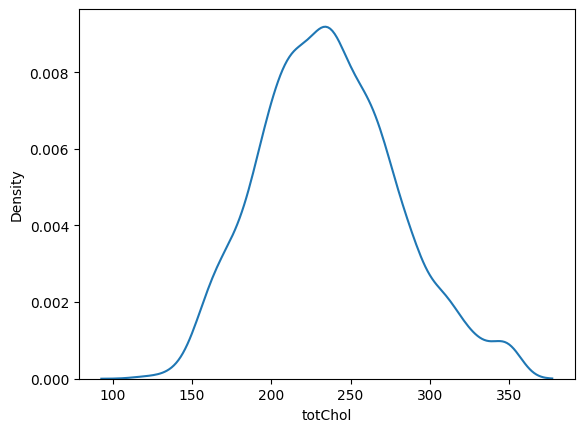

In [23]:
sns.kdeplot(df['totChol'])

In [24]:
df['totChol'].describe()

count    2927.000000
mean      236.704134
std        43.014891
min       119.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       351.000000
Name: totChol, dtype: float64

In [25]:
def tot_chol(data):
  if data >= 119 and data <= 159:
    return "very_low"
  if data >= 160 and data <= 189:
    return "low"
  if data >= 190 and data <=219:
    return "normal"
  if data >= 220 and data <= 249:
    return "high"
  else:
    return "very_high"


In [26]:
df['totChol'] = df['totChol'].apply(tot_chol)

In [27]:
df['totChol']

1          normal
2       very_high
3            high
4            high
5       very_high
          ...    
3384       normal
3385    very_high
3386       normal
3387    very_high
3389    very_high
Name: totChol, Length: 2927, dtype: object

In [28]:
#Very Low: Below 90 mm Hg
#Low: 90 - 100 mm Hg
#Normal: 100 - 120 mm Hg
#High: 120 - 140 mm Hg
#Very High: Above 140 mm Hg

In [29]:
df['sysBP'].describe()

count    2927.000000
mean      132.626409
std        22.326197
min        83.500000
25%       117.000000
50%       128.500000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

In [30]:
def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return np.where(column < lower_bound, lower_bound, np.where(column > upper_bound, upper_bound, column))



# Apply IQR method to specified column
df['sysBP']= replace_outliers_with_bounds(df['sysBP'])

In [31]:
df['sysBP'].describe()

count    2927.000000
mean      132.126751
std        20.729328
min        83.500000
25%       117.000000
50%       128.500000
75%       144.000000
max       184.500000
Name: sysBP, dtype: float64

<Axes: xlabel='sysBP', ylabel='Density'>

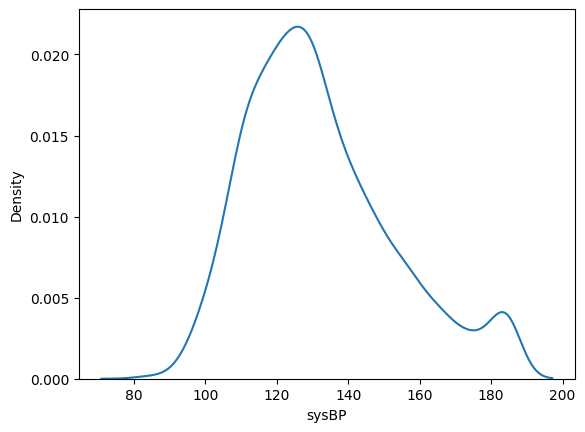

In [32]:
sns.kdeplot(df['sysBP'])

In [33]:
def sys_bp(data):
  if data >= 82 and data < 90:
    return "very_low"
  if data > 90 and data < 100:
    return "low"
  if data >100 and data < 120:
    return "normal"
  if data > 120 and data <= 140:
    return "high"
  else:
    return "very_high"

In [34]:
df['sysBP'] = df['sysBP'].apply(sys_bp)

In [35]:
# Very Low: Below 60 mm Hg
# Low: 60 - 70 mm Hg
# Normal: 70 - 80 mm Hg
# High: 80 - 90 mm Hg
# Very High: Above 90 mm Hg

In [36]:
df['diaBP'].describe()

count    2927.000000
mean       82.906218
std        12.078873
min        48.000000
25%        74.500000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64

In [37]:
def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return np.where(column < lower_bound, lower_bound, np.where(column > upper_bound, upper_bound, column))



# Apply IQR method to specified column
df['diaBP']= replace_outliers_with_bounds(df['diaBP'])

In [38]:
df['diaBP'].describe()

count    2927.000000
mean       82.754356
std        11.588050
min        51.250000
25%        74.500000
50%        82.000000
75%        90.000000
max       113.250000
Name: diaBP, dtype: float64

In [39]:
def dia_BP(data):
  if data >= 50 and data < 60:
    return "very_low"
  if data > 60 and data < 70:
    return "low"
  if data >70 and data < 80:
    return "normal"
  if data > 80 and data <= 90:
    return "high"
  else:
    return "very_high"

In [40]:
df['diaBP'] = df['diaBP'].apply(dia_BP)

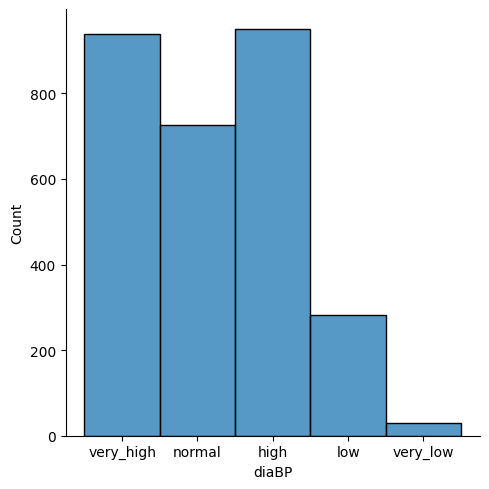

In [41]:
sns.displot(df['diaBP'])

In [42]:
# Very Low BMI:

# BMI less than 16: Severely underweight
# Low BMI:

# BMI 16 to 16.9: Underweight
# Normal BMI:

# BMI 17 to 24.9: Normal weight
# High BMI:

# BMI 25 to 29.9: Overweight
# Very High BMI:

# BMI 30 and above: Obese

In [43]:
df['BMI'].describe()

count    2927.000000
mean       25.797041
std         4.130376
min        15.960000
25%        23.030000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [44]:
def BMI(data):
  if data >= 10 and data < 16:
    return "very_low"
  if data >= 16 and data < 16.9:
    return "low"
  if data >=17 and data < 24.9:
    return "normal"
  if data >= 25 and data < 29.9:
    return "high"
  else:
    return "very_high"

In [45]:
df['BMI']=df['BMI'].apply(BMI)

In [46]:
# Very Low Heart Rate:

# Below 60 bpm (in adults): This could indicate bradycardia, a condition where the heart beats too slowly. In some cases, a low heart rate may be normal, especially for well-trained athletes.
# Low Heart Rate:

# 60 to 70 bpm (in adults): This range is considered normal for many adults at rest.
# Normal Heart Rate:

# 60 to 100 bpm (in adults): This is generally considered a normal range for resting heart rate in adults.
# High Heart Rate:

# 100 to 120 bpm (in adults): This may indicate tachycardia, a condition where the heart beats too quickly. It can be a normal response to exercise or stress.
# Very High Heart Rate:

# Above 120 bpm (in adults): This is typically considered a very high heart rate and may suggest a medical issue that requires attention.

In [47]:
df['heartRate'].describe()

count    2927.000000
mean       75.888282
std        11.971207
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [48]:
def hertRate(data):
  if data >= 10 and data < 60:
    return "very_low"
  if data >= 60 and data < 70:
    return "low"
  if data >=70 and data < 100:
    return "normal"
  if data >= 100 and data < 120:
    return "high"
  else:
    return "very_high"

In [49]:
df['heartRate']=df['heartRate'].apply(hertRate)

In [50]:
# Very Low Blood Glucose:

# Below 70 mg/dL: This is considered hypoglycemia, which can be dangerous and requires prompt attention.
# Low Blood Glucose:

# 70 to 99 mg/dL: This is generally considered the normal fasting blood glucose range for adults.
# Normal Blood Glucose:

# 100 to 125 mg/dL: This range may indicate impaired fasting glucose, which could be a precursor to diabetes.
# High Blood Glucose:

# 126 mg/dL and above: A fasting blood glucose level of 126 mg/dL or higher on two separate tests typically indicates diabetes.
# Very High Blood Glucose:

# Extremely high levels, such as 300 mg/dL or higher, can be indicative of poorly controlled diabetes and may require immediate medical attention.

In [51]:
df['glucose'].describe()

count    2927.000000
mean       81.934404
std        24.106943
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [52]:
def glucose(data):
  if data >= 10 and data < 70:
    return "very_low"
  if data >= 70 and data <= 99:
    return "low"
  if data >=100 and data <= 125:
    return "normal"
  if data >=126 and data < 160:
    return "high"
  else:
    return "very_high"

In [53]:
df['glucose'] = df['glucose'].apply(glucose)

In [54]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,normal,very_high,very_high,high,normal,low,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,very_high,normal,normal,normal,normal,low,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,high,very_high,high,high,low,low,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,high,high,high,high,normal,low,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,very_high,very_high,very_high,very_high,normal,very_low,1


In [55]:
df['cigsPerDay'].describe()

count    2927.000000
mean        9.112743
std        11.882784
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [56]:
def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR


    return np.where(column < lower_bound, lower_bound, np.where(column > upper_bound, upper_bound, column))



# Apply IQR method to specified column
df['cigsPerDay']=replace_outliers_with_bounds(df['cigsPerDay'])

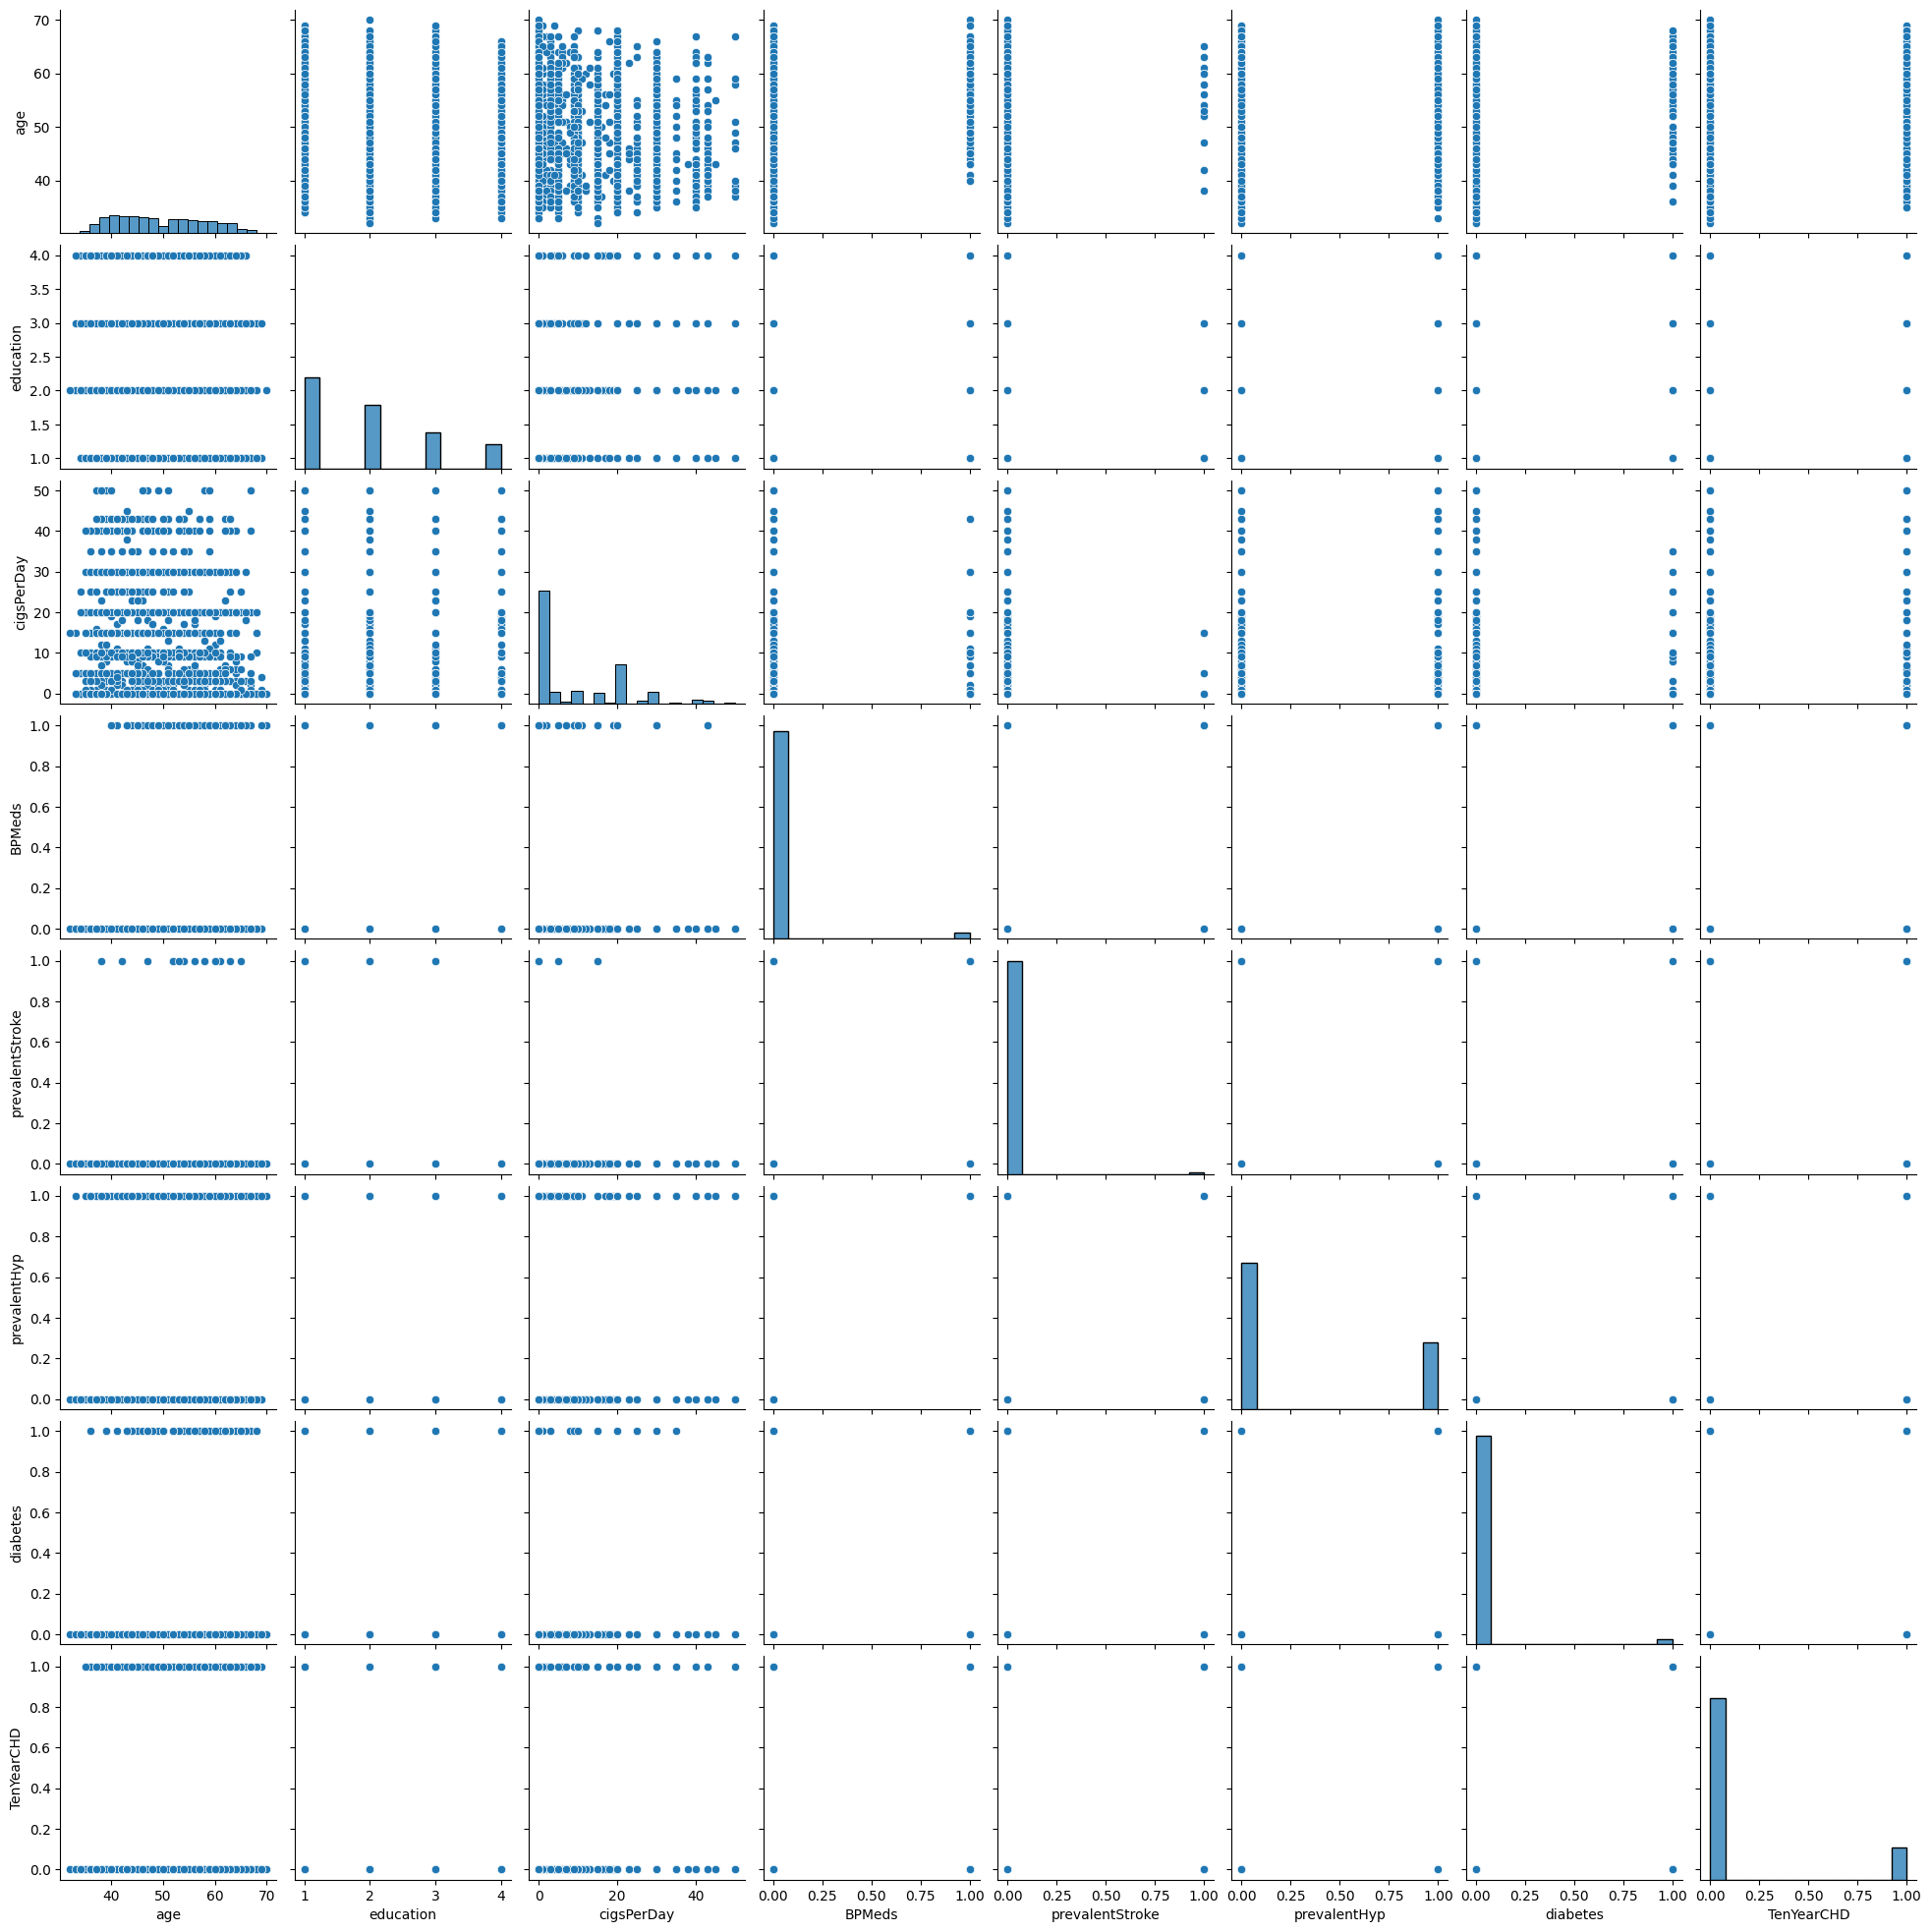

In [57]:
sns.pairplot(df)

In [58]:
df.drop(columns = ['education'], inplace= True)

In [59]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,normal,very_high,very_high,high,normal,low,0
2,46,F,YES,10.0,0.0,0,0,0,very_high,normal,normal,normal,normal,low,0
3,50,M,YES,20.0,0.0,0,1,0,high,very_high,high,high,low,low,1
4,64,F,YES,30.0,0.0,0,0,0,high,high,high,high,normal,low,0
5,61,F,NO,0.0,0.0,0,1,0,very_high,very_high,very_high,very_high,normal,very_low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,F,NO,0.0,0.0,0,1,0,normal,very_high,high,high,high,normal,0
3385,60,F,NO,0.0,0.0,0,0,0,very_high,high,normal,high,normal,normal,0
3386,46,F,NO,0.0,0.0,0,0,0,normal,normal,very_low,normal,normal,low,0
3387,44,M,YES,3.0,0.0,0,1,0,very_high,very_high,very_high,high,normal,low,1


In [60]:
def convert(data):
  if data == 'M':
    return 1
  else:
    return 0

In [61]:
df['sex']=df['sex'].apply(convert)

In [62]:
def convert_is_Smoking(data):
  if data == 'YES':
    return 1
  else:
    return 0

In [63]:
df['is_smoking'] = df['is_smoking'].apply(convert_is_Smoking)

In [64]:
df


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,normal,very_high,very_high,high,normal,low,0
2,46,0,1,10.0,0.0,0,0,0,very_high,normal,normal,normal,normal,low,0
3,50,1,1,20.0,0.0,0,1,0,high,very_high,high,high,low,low,1
4,64,0,1,30.0,0.0,0,0,0,high,high,high,high,normal,low,0
5,61,0,0,0.0,0.0,0,1,0,very_high,very_high,very_high,very_high,normal,very_low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0,0,0.0,0.0,0,1,0,normal,very_high,high,high,high,normal,0
3385,60,0,0,0.0,0.0,0,0,0,very_high,high,normal,high,normal,normal,0
3386,46,0,0,0.0,0.0,0,0,0,normal,normal,very_low,normal,normal,low,0
3387,44,1,1,3.0,0.0,0,1,0,very_high,very_high,very_high,high,normal,low,1


In [65]:
def encoder(data):
  if data == "very_low":
    return 0
  if data == "low":
    return 1
  if data == "normal":
    return 2
  if data  == "high":
    return 3
  else:
    return 4

In [66]:
df['totChol'] =df['totChol'].apply(encoder)
df['sysBP'] =df['sysBP'].apply(encoder)
df['diaBP'] =df['diaBP'].apply(encoder)
df['BMI'] = df['BMI'].apply(encoder)
df['heartRate'] = df['heartRate'].apply(encoder)
df['glucose'] =df['glucose'].apply(encoder)

In [67]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,2,4,4,3,2,1,0
2,46,0,1,10.0,0.0,0,0,0,4,2,2,2,2,1,0
3,50,1,1,20.0,0.0,0,1,0,3,4,3,3,1,1,1
4,64,0,1,30.0,0.0,0,0,0,3,3,3,3,2,1,0
5,61,0,0,0.0,0.0,0,1,0,4,4,4,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0,0,0.0,0.0,0,1,0,2,4,3,3,3,2,0
3385,60,0,0,0.0,0.0,0,0,0,4,3,2,3,2,2,0
3386,46,0,0,0.0,0.0,0,0,0,2,2,0,2,2,1,0
3387,44,1,1,3.0,0.0,0,1,0,4,4,4,3,2,1,1


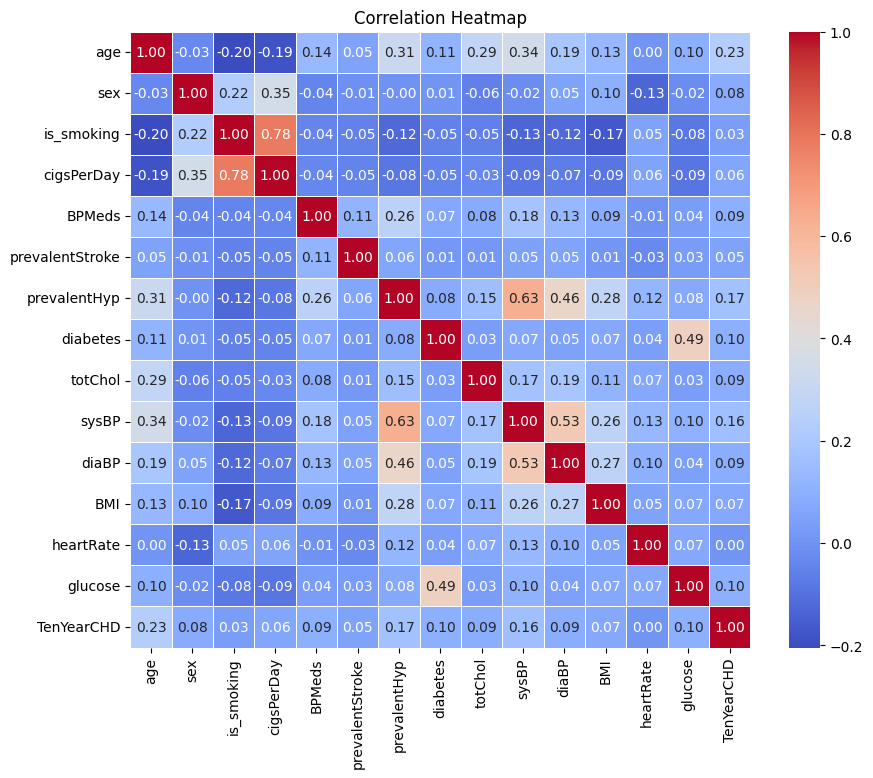

In [87]:

corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


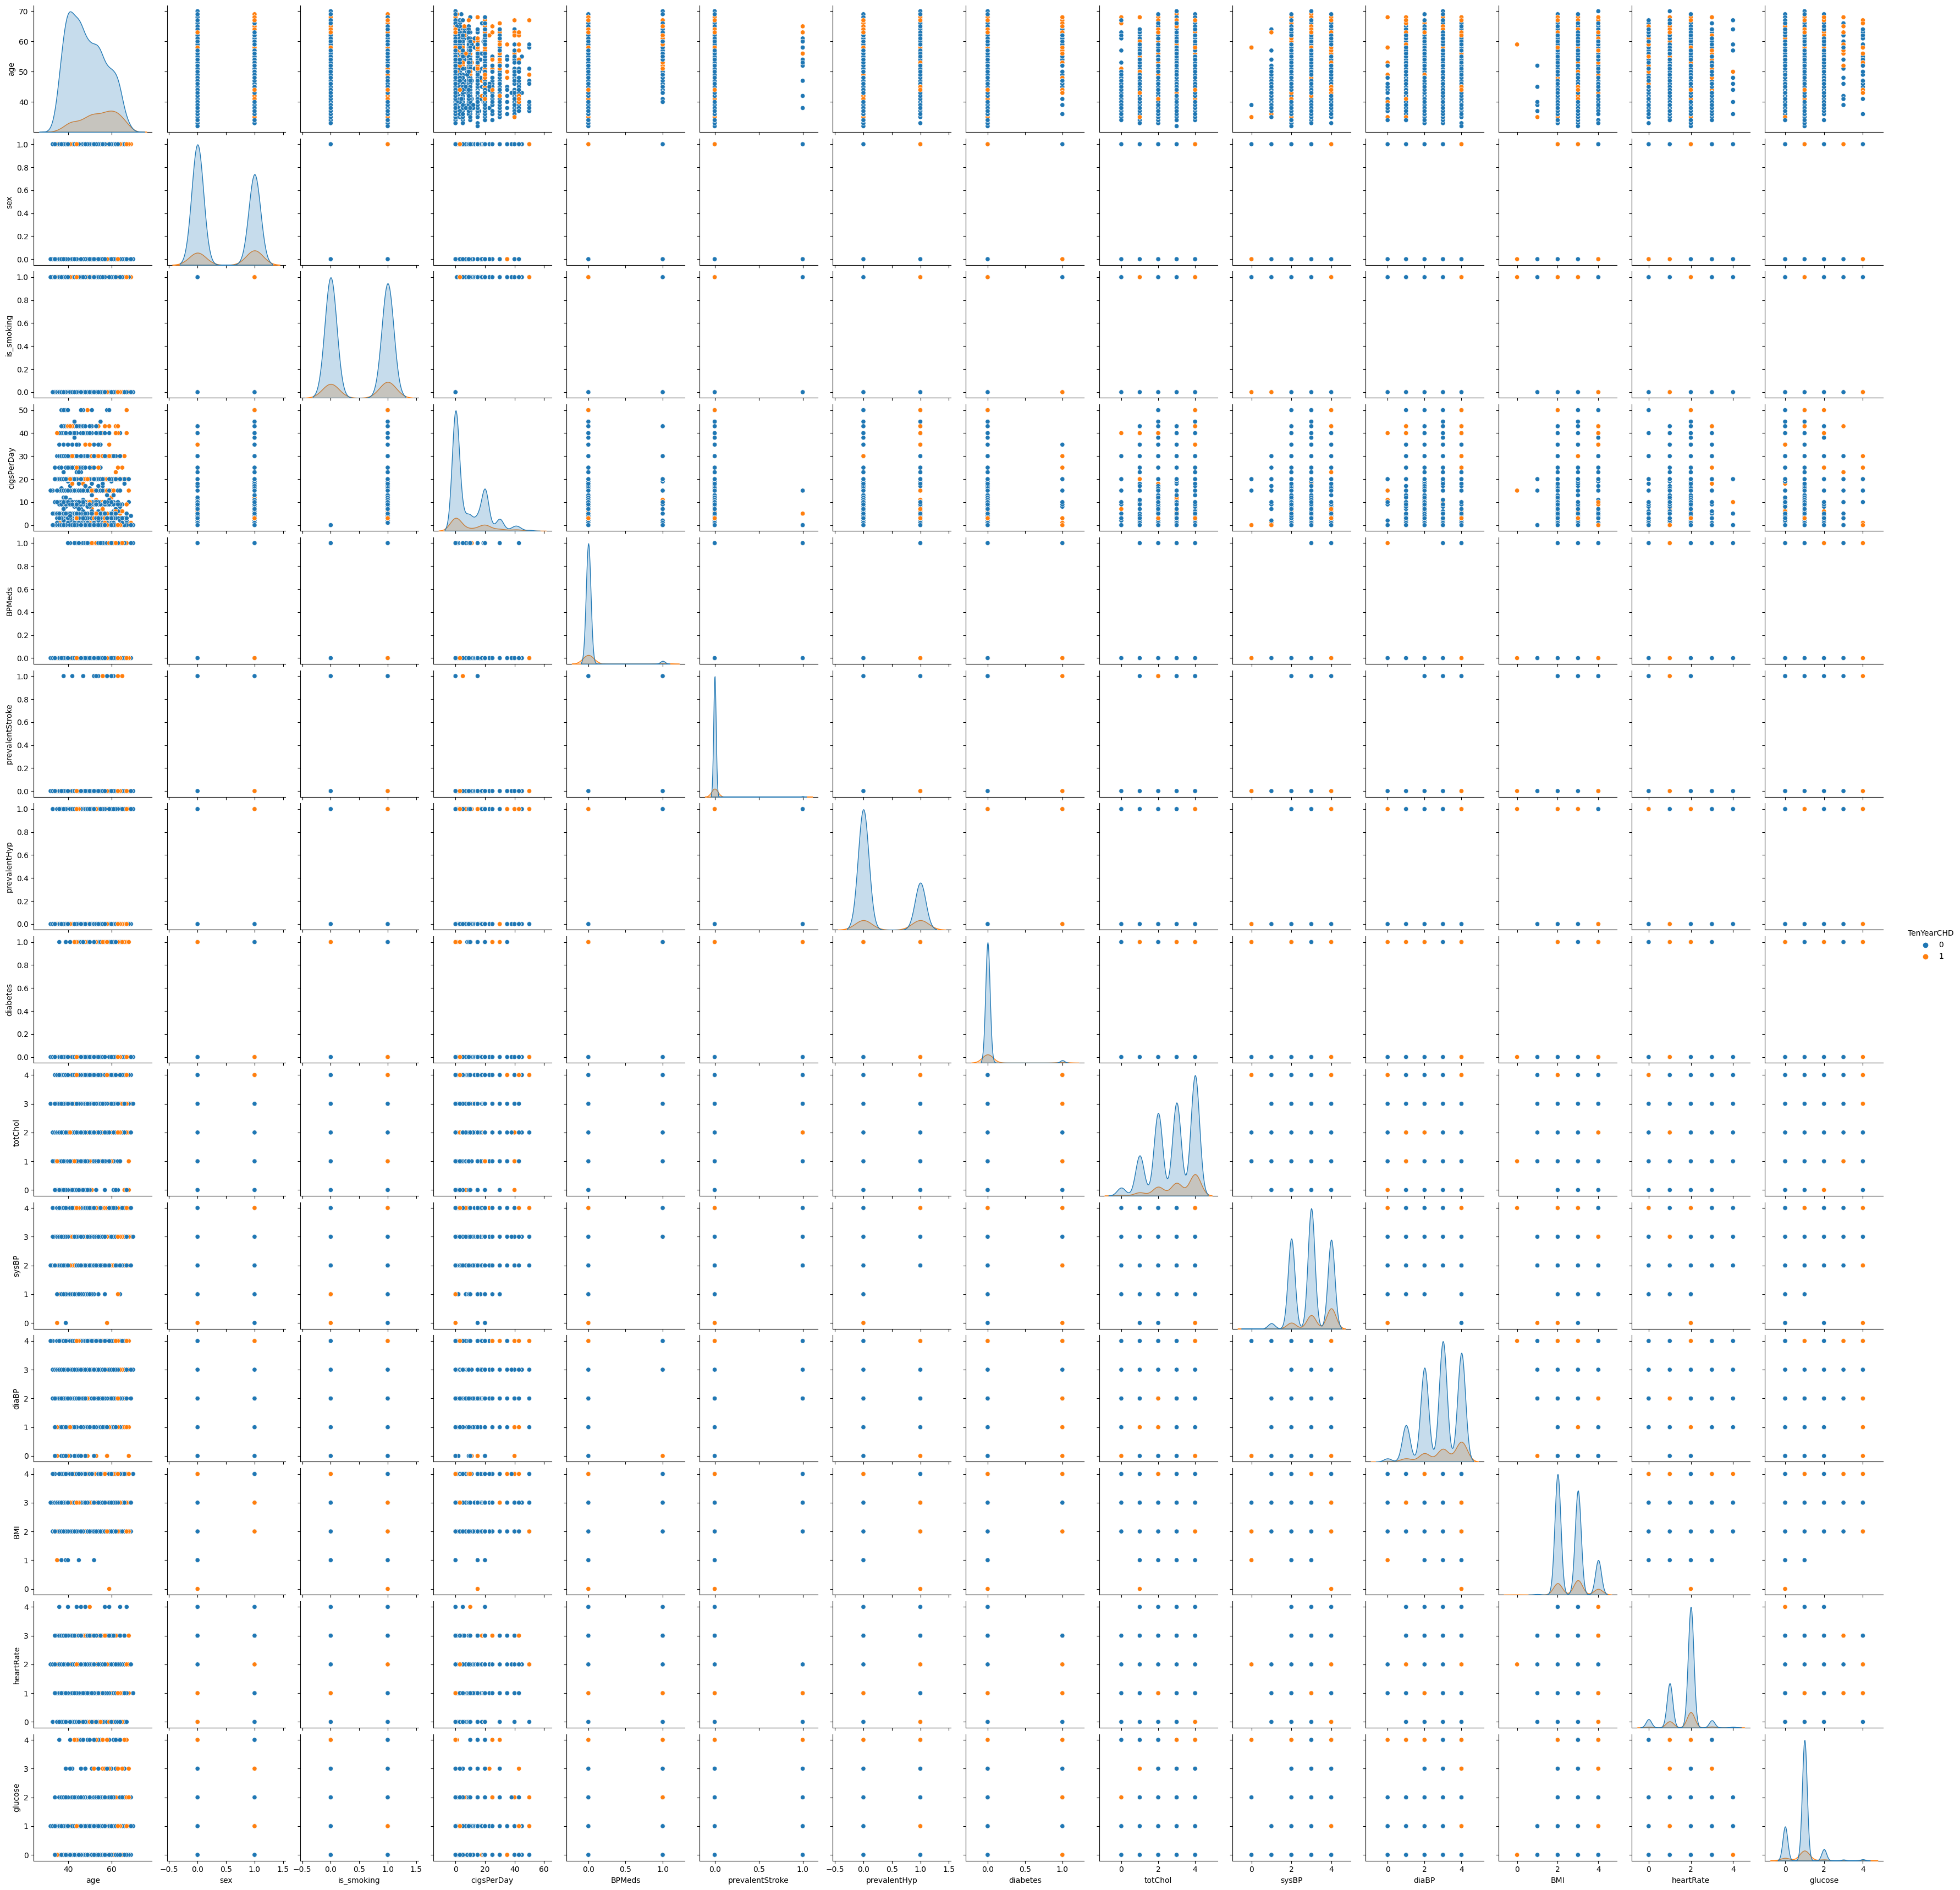

In [90]:
sns.pairplot(df, hue='TenYearCHD' ,diag_kind='kde')

# Show the plot
plt.show()


In [68]:
x = df[['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [69]:
y = df['TenYearCHD']

In [70]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.25,random_state = 45)

In [71]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(x_train)
# X_test_scaled = scaler.transform(x_test)

In [72]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# logistic_reg_model = LogisticRegression()

# # Step 3: Train the model on the training data
# logistic_reg_model.fit(X_train_scaled, y_train)

# # Step 4: Make predictions on the test set
# y_pred = logistic_reg_model.predict(X_test_scaled)

# # Step 5: Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{classification_rep}')


In [73]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# from sklearn.metrics import confusion_matrix





# # Step 3: Define hyperparameters for tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],      # Number of trees in the forest
#     'max_depth': [3, 4, 5],              # Maximum depth of each tree
#     'min_samples_split': [2, 3, 4],     # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 3]       # Minimum number of samples required to be at a leaf node
# }

# # Step 4: Initialize Random Forest Classifier
# rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# # Step 5: Initialize Grid Search for hyperparameter tuning
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Step 6: Get the best model from Grid Search
# best_model = grid_search.best_estimator_

# # Step 7: Make predictions on the test set
# y_pred = best_model.predict(X_test_scaled)

# # Step 8: Generate Classification Report
# class_report = classification_report(y_test, y_pred)

# print(class_report)
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(confusion_mat)

In [74]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

In [75]:
# import xgboost as xgb
# from sklearn.metrics import classification_report


# xgb_classifier = xgb.XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train))

# # Step 3: Train the model
# xgb_classifier.fit(X_train_scaled, y_train)

# # Step 4: Make predictions on the test set
# y_pred = xgb_classifier.predict(X_test_scaled)

# # Step 5: Generate Classification Report
# class_report = classification_report(y_test, y_pred)

# print(class_report)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)


In [76]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, cross_val_predict
# from sklearn.metrics import classification_report

# # Assuming you have a dataset X (features) and y (target variable) prepared

# # Step 1: Define hyperparameters for tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],      # Number of boosting rounds
#     'max_depth': [3, 4, 5],              # Maximum depth of trees
#     'learning_rate': [0.01, 0.1, 0.2],  # Step size for weight update
# }

# # Step 2: Initialize the XGBoost Classifier
# xgb_classifier = xgb.XGBClassifier(scale_pos_weight=(len(y)-sum(y))/sum(y), random_state=42)

# # Step 3: Initialize Grid Search for hyperparameter tuning
# grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Step 4: Get the best model from Grid Search
# best_model = grid_search.best_estimator_

# # Step 5: Perform Cross-Validation and Prediction
# y_pred_cv = cross_val_predict(best_model, X_train_scaled, y_train, cv=5)

# # Step 6: Generate Classification Report
# class_report = classification_report(y_train, y_pred_cv)

# print(class_report)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

In [77]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# models = [
#     RandomForestClassifier(class_weight='balanced', random_state=42),
#     GradientBoostingClassifier(random_state=42),
#     LogisticRegression(class_weight='balanced', random_state=42),
#     SVC(class_weight='balanced', random_state=42)
# ]

# # Step 3: Train and evaluate models
# for model in models:
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     class_report = classification_report(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
#     print(class_report)


In [78]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from imblearn.over_sampling import RandomOverSampler

# # Assuming you have a dataset X (features) and y (target variable) prepared

# # List of classifiers to evaluate
# classifiers = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42),
#     "SVC": SVC(probability=True, random_state=42),
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "QDA": QuadraticDiscriminantAnalysis()
# }

# ros = RandomOverSampler(random_state=0)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# # Step 3: Loop through classifiers and evaluate accuracy
# max_accuracy = 0
# best_model = None

# for name, clf in classifiers.items():
#     clf.fit(X_train_resampled, y_train_resampled)
#     y_pred = clf.predict(X_test_scaled)
#     accuracy = accuracy_score(y_test, y_pred)

#     if accuracy > max_accuracy:
#         max_accuracy = accuracy
#         best_model = (name, clf)

#     print(f"{name} Accuracy: {accuracy}")

# # Step 4: Evaluate the best model using classification report
# best_name, best_clf = best_model
# y_pred_best = best_clf.predict(X_test_scaled)
# report_best = classification_report(y_test, y_pred_best)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nBest Model: {best_name}")
# print("Classification Report:")
# print(report_best)
# print(accuracy)


In [79]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# smote = SMOTE(random_state=42)

# # Step 3: Apply SMOTE to the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# # Step 4: Initialize and train a classifier (for example, RandomForest)
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train_resampled, y_train_resampled)

# # Step 5: Make predictions on the test set
# y_pred = rf_classifier.predict(X_test_scaled)

# # Step 6: Generate Classification Report
# class_report = classification_report(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)
# print(class_report)


In [80]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# # Step 3: Apply SMOTE to the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# # Step 4: Initialize and train a classifier (for example, RandomForest)
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train_resampled, y_train_resampled)

# # Step 5: Make predictions on the test set
# y_pred = rf_classifier.predict(X_test_scaled)

# # Step 6: Generate Classification Report
# class_report = classification_report(y_test, y_pred)

# print(class_report)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)
# print(class_report)


In [81]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

# # Assuming you have a dataset X (features) and y (target variable) prepared

# # Step 1: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Step 2: Data Preprocessing
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 3: One-Hot Encode the target variable (if it's not binary)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# # Step 4: Initialize the Neural Network
# model = Sequential()

# # Step 5: Add layers to the Neural Network
# model.add(Dense(units=64, activation='relu', input_dim=14))  # Input layer with 14 features
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=2, activation='softmax'))  # Output layer with 2 classes (adjust as needed)

# # Step 6: Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Step 7: Train the model
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# # Step 8: Evaluate the model
# accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
# print(f'Accuracy: {accuracy * 100:.2f}%')


In [82]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
# from sklearn.metrics import classification_report

# # Assuming you have a dataset X (features) and y (target variable) prepared

# # Step 1: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Step 2: Data Preprocessing
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 3: One-Hot Encode the target variable (if it's not binary)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# # Step 4: Initialize the Neural Network
# model = Sequential()

# # Step 5: Add layers to the Neural Network
# model.add(Dense(units=64, activation='relu', input_dim=14))  # Input layer with 14 features
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=2, activation='softmax'))  # Output layer with 2 classes (adjust as needed)

# # Step 6: Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Step 7: Train the model
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# # Step 8: Evaluate the model
# accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Step 9: Generate Classification Report
# y_pred = np.argmax(model.predict(X_test), axis=-1)
# y_true = np.argmax(y_test, axis=-1)
# class_report = classification_report(y_true, y_pred)

# print("Classification Report:")
# print(class_report)


In [83]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.metrics import classification_report

# # Assuming you have a dataset X (features) and y (target variable) prepared

# # Step 1: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Step 2: Data Preprocessing
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 3: Initialize the Neural Network
# model = Sequential()

# # Step 4: Add layers to the Neural Network
# model.add(Dense(units=64, activation='relu', input_dim=14))  # Input layer with 14 features

# # Add 8 hidden layers with 64 units and relu activation
# for _ in range(8):
#     model.add(Dense(units=64, activation='relu'))

# model.add(Dense(units=2, activation='softmax'))  # Output layer with 2 classes (adjust as needed)

# # Step 5: Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Step 6: Train the model
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# # Step 7: Evaluate the model
# accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Step 8: Generate Classification Report
# y_pred = np.argmax(model.predict(X_test), axis=-1)
# class_report = classification_report(y_test, y_pred)

# print("Classification Report:")
# print(class_report)


In [84]:
# x.shape

In [85]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Step 2: Data Preprocessing
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# param_grid = {
#     'n_estimators': [50, 100, 200],      # Number of trees in the forest
#     'max_depth': [3, 4, 5],              # Maximum depth of each tree
#     'min_samples_split': [2, 3, 4],     # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 3]       # Minimum number of samples required to be at a leaf node
# }

# # Step 4: Initialize Random Forest Classifier
# rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# # Step 5: Initialize Grid Search for hyperparameter tuning
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Step 6: Get the best model from Grid Search
# best_model = grid_search.best_estimator_

# # Step 7: Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Step 8: Generate Classification Report
# class_report = classification_report(y_test, y_pred)

# print(class_report)
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(confusion_mat)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

In [86]:
# corr_matrix = df.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 20, as_cmap=True)

# # Draw the heatmap with the correct aspect ratio
# sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

# # Show the plot
# plt.show()